# Importing Libraries and Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
penguins = pd.read_csv('/content/penguins.csv')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#EDA

In [ ]:
penguins.shape #rows , columns

(344, 7)

In [ ]:
penguins.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.describe() #statistical info

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Handling Missing Values:

In [ ]:
penguins.isnull().sum() #checking total null values in each column

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#replacing null values with mean /mode of the column
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(), inplace = True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(), inplace = True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace = True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace = True)
penguins['sex'].fillna(penguins['sex'].mode()[0], inplace = True)

In [ ]:
penguins.head() #dataset after handling null values

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Checking Outliers:


In [ ]:
categorical_columns = ['species', 'island', 'sex'] #initializing categorical columns
#Checking frequency of each unique value in categorical columns
for column in categorical_columns:
    print(f"Frequency distribution for {column}:")
    print(penguins[column].value_counts())
    print()

Frequency distribution for species:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Frequency distribution for island:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Frequency distribution for sex:
sex
MALE      179
FEMALE    165
Name: count, dtype: int64



The above frequency shows a realtive distribution of each unique value in each column, so there are no outliers in categorical columns.

In [ ]:
#initializing numerical columnc
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
#check outliers by z-scores:
z_scores = stats.zscore(penguins[numerical_columns])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).sum(axis=0) #threshold set to 3
print(f'Number of outliers in each numerical column:\n{outliers}')

Number of outliers in each numerical column:
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64


The above z-scores show that there are no outliers in numerical columns

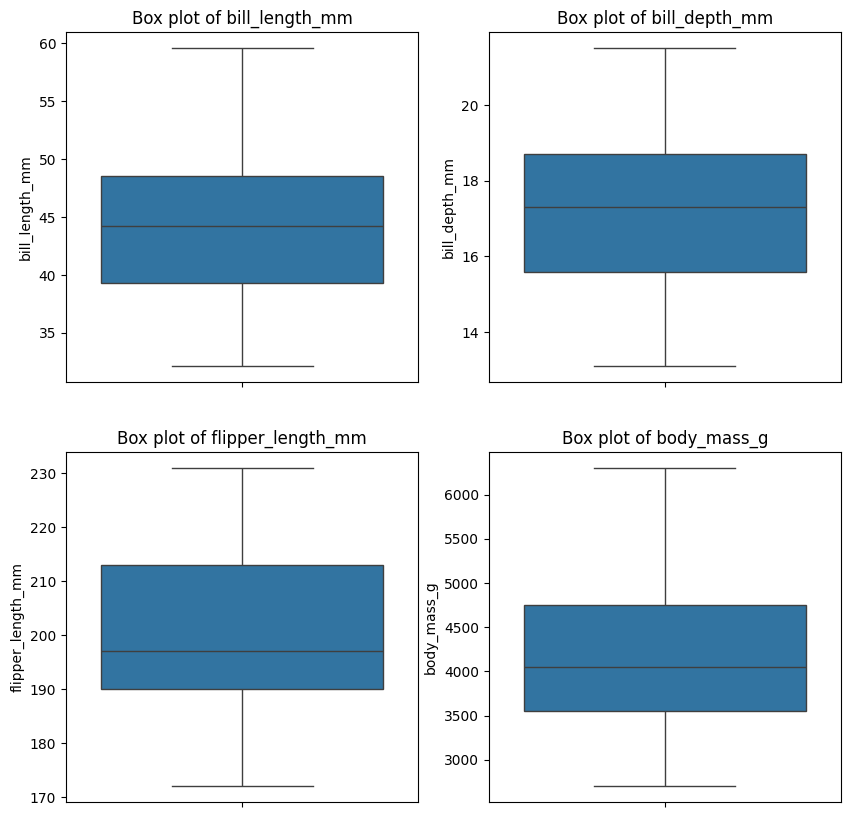

In [ ]:
#checking outliers using boxplots for numerical columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=penguins[column])
    plt.title(f'Box plot of {column}')

The above boxplots show no outliers in the columns

# One Hot Encoding for Categorical Columns:

In [ ]:
#converting categorical columns to numerical ones using pd.get_dummies (0/1 for each entry)
penguins = pd.get_dummies(penguins, columns = ['island', 'sex']) #not including species because we will need it afterwards for pca
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,39.10000,18.70000,181.000000,3750.000000,False,False,True,False,True
1,Adelie,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,Adelie,40.30000,18.00000,195.000000,3250.000000,False,False,True,True,False
3,Adelie,43.92193,17.15117,200.915205,4201.754386,False,False,True,False,True
4,Adelie,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False


# PCA Implementation:

In [ ]:
#first, we scale numerical columns
scaler = StandardScaler()
penguins[numerical_columns] = scaler.fit_transform(penguins[numerical_columns])

In [ ]:
penguins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,Adelie,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,False,False,True,False,True
1,Adelie,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,False,False,True,True,False
2,Adelie,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,False,False,True,True,False
3,Adelie,-1.307172e-15,1.806927e-15,0.000000,0.000000,False,False,True,False,True
4,Adelie,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,-1.307172e-15,1.806927e-15,0.000000,0.000000,True,False,False,False,True
340,Gentoo,5.294731e-01,-1.450118e+00,1.006038,0.811880,True,False,False,True,False
341,Gentoo,1.191758e+00,-7.380718e-01,1.506028,1.939064,True,False,False,False,True
342,Gentoo,2.351241e-01,-1.195816e+00,0.791756,1.250229,True,False,False,True,False


In [ ]:
#initializing pca
pca = PCA(n_components=2) #2 columns
penguins_pca = penguins.drop(['species'], axis=1)
principal_components = pca.fit_transform(penguins_pca)

In [ ]:
#sub dataset for pca derived from original using pca
pca_penguins = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_penguins = pd.concat([pca_penguins, penguins[['species']].reset_index(drop=True)], axis=1) #adding species for k means later

In [ ]:
pca_penguins

,Principal Component 1,Principal Component 2,species
0,-1.822502,0.432270,Adelie
1,-1.449864,-0.716461,Adelie
2,-1.517008,-0.525039,Adelie
3,-0.045259,0.379320,Adelie
4,-1.998941,-0.330922,Adelie
...,...,...,...
339,0.228149,0.205265,Gentoo
340,1.862704,-1.172179,Gentoo
341,2.900565,0.497376,Gentoo
342,1.755547,-1.072738,Gentoo


# K Means:

In [ ]:
#sum of squared error for k means clustering:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42) #applying k means
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

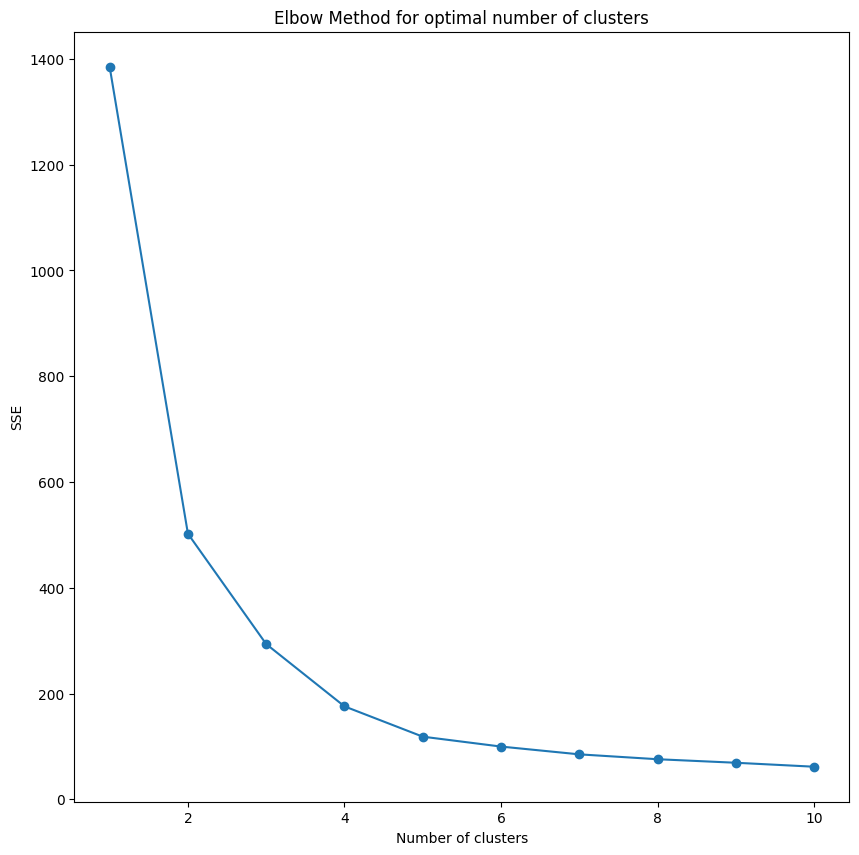

In [ ]:
#Elbow curve visualisation:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 11, 1), sse, marker='o')
plt.title('Elbow Method for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

The above graph shows that the elbow starts at clusters = 3

In [ ]:
optimal_clusters = 3 #3 clusters
k_means = KMeans(n_clusters=optimal_clusters, random_state=42) #applying k means
kmeans.fit(principal_components) #fitting k means to pca data
labels = kmeans.labels_ #getting labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-163-9ad79c2e34c9>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pca_penguins, x='Principal Component 1', y='Principal Component 2', palette='Set1', style='species', s=100)


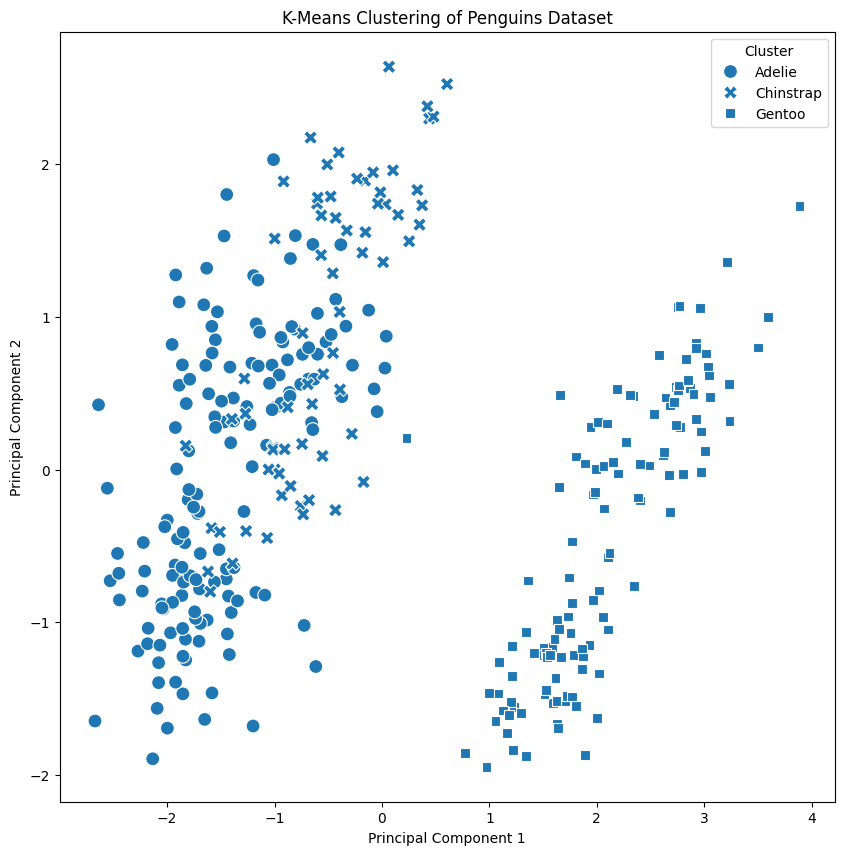

In [ ]:
#Plotting K means graph from pca on penguins dataset
plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_penguins, x='Principal Component 1', y='Principal Component 2', palette='Set1', style='species', s=100)
plt.title('K-Means Clustering of Penguins Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()